In [1]:
from benchmark_new import *
%matplotlib inline

In [2]:
helpers = 'best_affinity_diverse'
mcss = '../../../mcss_sizes.pkl'

data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
data = add_correct(data, thresh = 2.0)
#data = filter_to_ubiquitous_ligands(data)
data = data[  (data.index.get_level_values('protein') != 'A2AR')
            & (data.index.get_level_values('protein') != 'TRPV1')
            & (data.index.get_level_values('protein') != 'MAPK14')
            & (data.index.get_level_values('protein') != 'VDR')]
data = data[data.mcss < 0.5]
data = data[data.best_correct]

ligand = data.xs((helpers, 'standard', 20, 'mcss_contact_hbond_sb', 1.0),
                  level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
print(ligand.shape[0])
family_ligand = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
family_target = target.groupby(level=list(range(len(target.index.levels)-1))).mean()

272


In [5]:
def make_table(target_df, family_df):
    table = []

    target_df = target_df.sort_values(['family', 'glide_correct'], ascending=[True, False])
    for family in family_df.index.get_level_values('family'):
        family_level = family_target[family_target.index.get_level_values('family') == family].copy()
        target_level = target_df[target_df.index.get_level_values('family') == family].copy()
        
        family_level['protein'] = family

        # index
        family_level.reset_index(inplace=True)
        target_level.reset_index(inplace=True)
        family_level = family_level.set_index(['family', 'protein'])
        target_level = target_level.set_index(['family', 'protein'])
        table += [family_level]
        table += [target_level]
    table = pd.concat(table).filter(regex='correct').round(2)
    table.rename(columns={'combind_correct':'combind',
                          'glide_correct':'glide',
                          'best_correct':'best',
                          }, inplace=True)
    return table

def dumbell(table):
    f, ax = plt.subplots(figsize = (3, len(table)/3.1))

    last = None
    i = -1
    yticks = []
    for label, values in table[::-1].iterrows():
        if last != label[0]:
            i += 2
            last = label[0]

        if label[1] in drugs:
            i += 0.5

        i += 1
        yticks += [i]

        g, c, b = values[['glide','combind', 'best']]

        if label[1] in drugs:
            s = 50
            lw = 2
            alpha = 1
        else:
            s = 30
            lw = 1
            alpha = 1

        plt.plot([g, c], [i, i], c = 'grey', lw=lw, alpha = alpha)
        plt.scatter(c, i, c = 'g', s=s, alpha = alpha)
        plt.scatter(g, i, c = 'm', s=s, alpha = alpha)


    yticklabels = list(table.index.get_level_values(-1)[::-1])
    plt.yticks(yticks, yticklabels, fontsize = 12)
    plt.xlim(0, 1)
    plt.ylim(min(yticks)-1, max(yticks)+1)
    plt.show()

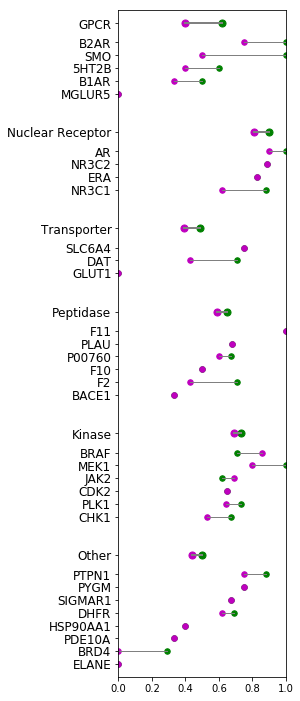

In [8]:
table = make_table(target, family_target)
dumbell(table)

In [7]:
table

combind  glide  best
family           protein                               
GPCR             GPCR                 0.62   0.40   1.0
                 B2AR                 1.00   0.75   1.0
                 SMO                  1.00   0.50   1.0
                 5HT2B                0.60   0.40   1.0
                 B1AR                 0.50   0.33   1.0
                 MGLUR5               0.00   0.00   1.0
Nuclear Receptor Nuclear Receptor     0.90   0.81   1.0
                 AR                   1.00   0.90   1.0
                 NR3C2                0.89   0.89   1.0
                 ERA                  0.83   0.83   1.0
                 NR3C1                0.88   0.62   1.0
Transporter      Transporter          0.49   0.39   1.0
                 SLC6A4               0.75   0.75   1.0
                 DAT                  0.71   0.43   1.0
                 GLUT1                0.00   0.00   1.0
Peptidase        Peptidase            0.65   0.59   1.0
                 F11                  1.00   1.00   1.0
                 PLAU                 0.68   0.68   1.0
                 P00760               0.67   0.60   1.0
                 F10                  0.50   0.50   1.0
                 F2                   0.71   0.43   1.0
                 BACE1                0.33   0.33   1.0
Kinase           Kinase               0.73   0.69   1.0
                 BRAF                 0.71   0.86   1.0
                 MEK1                 1.00   0.80   1.0
                 JAK2                 0.62   0.69   1.0
                 CDK2                 0.65   0.65   1.0
                 PLK1                 0.73   0.64   1.0
                 CHK1                 0.67   0.53   1.0
Other            Other                0.50   0.44   1.0
                 PTPN1                0.88   0.75   1.0
                 PYGM                 0.75   0.75   1.0
                 SIGMAR1              0.67   0.67   1.0
                 DHFR                 0.69   0.62   1.0
                 HSP90AA1             0.40   0.40   1.0
                 PDE10A               0.33   0.33   1.0
                 BRD4                 0.29   0.00   1.0
                 ELANE                0.00   0.00   1.0